# Time series Analysis

In [109]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = 'tight'
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [110]:
url = "ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_weekly_mlo.txt"
names = ["year", "month", "day", "year_decimal", "co2", "days", "1 yr ago",
          "10 yr ago", "since 1800"]
maunaloa = pd.read_csv(url, skiprows=49, header=None, delim_whitespace=True,
                       names=names, na_values=[-999.99])
maunaloa.head()

,year,month,day,year_decimal,co2,days,1 yr ago,10 yr ago,since 1800
0,1974,5,19,1974.3795,333.37,5,NaN,NaN,50.40
1,1974,5,26,1974.3986,332.95,6,NaN,NaN,50.06
2,1974,6,2,1974.4178,332.35,5,NaN,NaN,49.60
3,1974,6,9,1974.4370,332.20,7,NaN,NaN,49.65
4,1974,6,16,1974.4562,332.37,7,NaN,NaN,50.06


In [111]:
maunaloa = pd.read_csv(url, skiprows=49, header=None, delim_whitespace=True,
                       names=names, parse_dates=[[0, 1, 2]], na_values=[-999.99],
                       index_col="year_month_day")
maunaloa.head()

,year_decimal,co2,days,1 yr ago,10 yr ago,since 1800
year_month_day,,,,,,
1974-05-19,1974.3795,333.37,5,NaN,NaN,50.40
1974-05-26,1974.3986,332.95,6,NaN,NaN,50.06
1974-06-02,1974.4178,332.35,5,NaN,NaN,49.60
1974-06-09,1974.4370,332.20,7,NaN,NaN,49.65
1974-06-16,1974.4562,332.37,7,NaN,NaN,50.06


In [72]:

maunaloa.co2.head()


year_month_day
1974-05-19    333.37
1974-05-26    332.95
1974-06-02    332.35
1974-06-09    332.20
1974-06-16    332.37
Name: co2, dtype: float64

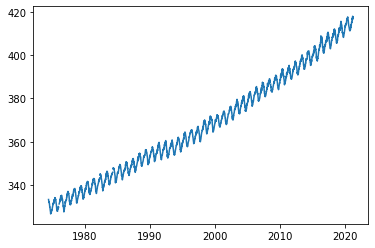

In [73]:
import matplotlib.pyplot as plt 

plt.plot(maunaloa.index,maunaloa.co2)

Forward Filling missing valuse even tho values missing are not visible in plot there are 18 missing values

In [112]:
# set index frequency for statsmodel models
maunaloa.index = pd.DatetimeIndex(maunaloa.index, freq=maunaloa.index.inferred_freq)


In [113]:
maunaloa.co2.isnull().sum() #total missing values


18

# Forward Fill

In [114]:
maunaloa.fillna(method="ffill", inplace=True)  # or bfill for backwar fill
maunaloa.co2.isnull().sum()#total missing values will be zero now

0

In [115]:
# resampling is lazy
resampled_co2 = maunaloa.co2.resample("MS")
resampled_co2

In [116]:
resampled_co2.mean().head()


year_month_day
1974-05-01    333.1600
1974-06-01    332.0660
1974-07-01    330.7125
1974-08-01    329.0975
1974-09-01    327.3280
Freq: MS, Name: co2, dtype: float64

In [117]:
maunaloa.co2.rename('W')


year_month_day
1974-05-19    333.37
1974-05-26    332.95
1974-06-02    332.35
1974-06-09    332.20
1974-06-16    332.37
               ...  
2021-02-14    416.51
2021-02-21    416.31
2021-02-28    417.97
2021-03-07    416.94
2021-03-14    417.73
Freq: W-SUN, Name: W, Length: 2444, dtype: float64

# Resampling

<AxesSubplot:xlabel='year_month_day'>

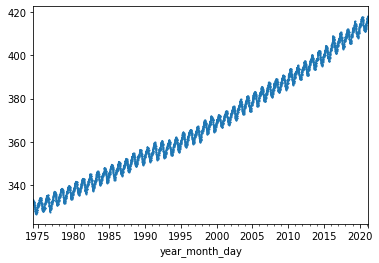

In [118]:
maunaloa.co2.resample("W").mean().plot(marker="o", markersize=1)


<AxesSubplot:xlabel='year_month_day'>

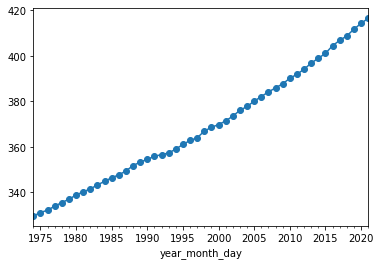

In [119]:
maunaloa.co2.resample("AS").mean().plot(marker="o")


<AxesSubplot:xlabel='year_month_day'>

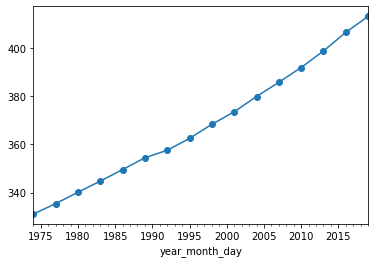

In [120]:
maunaloa.co2.resample("3AS").mean().plot(marker="o")


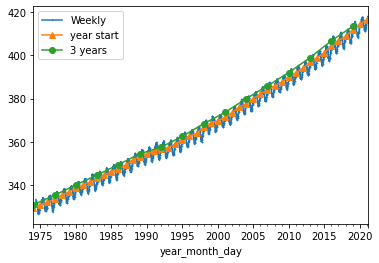

In [121]:
maunaloa.co2.resample("W").mean().rename("Weekly").plot(marker=".", markersize=1)
maunaloa.co2.resample("AS").mean().rename("year start").plot(marker="^")
maunaloa.co2.resample("3AS").mean().rename("3 years").plot(marker="o")
plt.legend()


as it is clear resampling ended up killing  the weekly trend so it require more care and better udertanding of what is your problem and task you are solving

# Linear model for trend using Linear Regression

In [122]:
train = ppm[:500]
test = ppm[500:]
X = ppm.index.to_series().apply(lambda x: x.toordinal())
X = pd.DataFrame(X)

X_train, X_test = X.iloc[:500, :], X.iloc[500:, :]
X_train.shape


(500, 1)

<AxesSubplot:xlabel='year_month_day'>

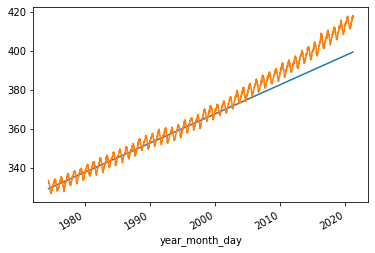

In [123]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, train)
lr_pred = lr.predict(X_test)
plt.plot(ppm.index, lr.predict(X))
ppm.plot()

<AxesSubplot:xlabel='year_month_day'>

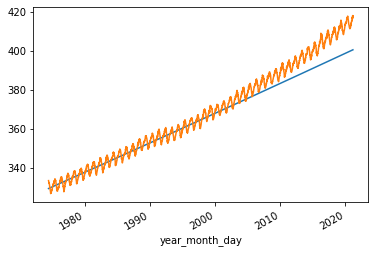

In [125]:
from sklearn.preprocessing import PolynomialFeatures
lr_poly = make_pipeline(PolynomialFeatures(include_bias=False), LinearRegression())
lr_poly.fit(X_train, train)

plt.plot(ppm.index, lr_poly.predict(X))
ppm.plot()

In [126]:
lr_poly

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

# Stationarity 

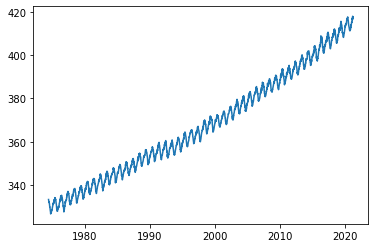

In [127]:
plt.plot(maunaloa.index,maunaloa.co2)

Mean changes -> means series is not stationary, there is a trend

# Autocorrelation

In [128]:
ppm = maunaloa.co2
ppm.autocorr()

0.9997386312571951

C:\Users\Syed Muhammmad Hamza\anaconda3\envs\PY37\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
C:\Users\Syed Muhammmad Hamza\anaconda3\envs\PY37\lib\site-packages\statsmodels\tsa\stattools.py:666: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


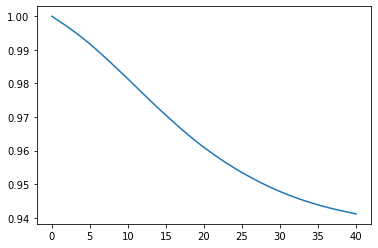

In [129]:
from statsmodels.tsa.stattools import acf
autocorrelation = acf(ppm)
plt.plot(autocorrelation)

Autocorrelation function


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

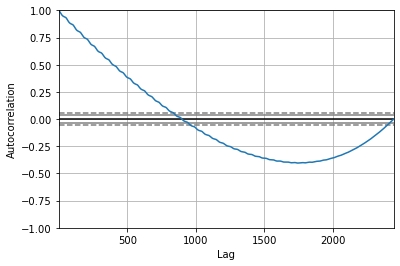

In [130]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ppm)


To make our Time series Stationary we will use de-trending specifically differencing

# De-trending


<AxesSubplot:xlabel='year_month_day'>

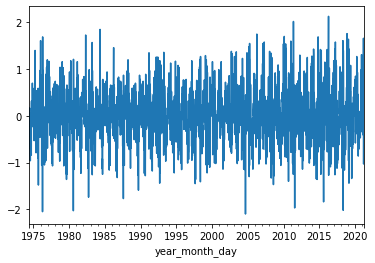

In [131]:
ppm.diff().plot()


now our mean is visibily zero

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

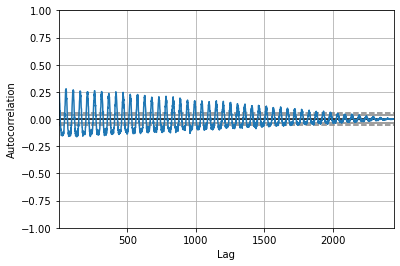

In [132]:
autocorrelation_plot(ppm.diff()[1:])


C:\Users\Syed Muhammmad Hamza\anaconda3\envs\PY37\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
C:\Users\Syed Muhammmad Hamza\anaconda3\envs\PY37\lib\site-packages\statsmodels\tsa\stattools.py:666: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


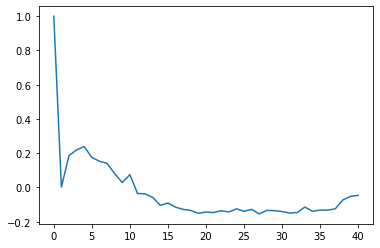

In [133]:
autocorrelation = acf(ppm.diff()[1:])
plt.plot(autocorrelation)


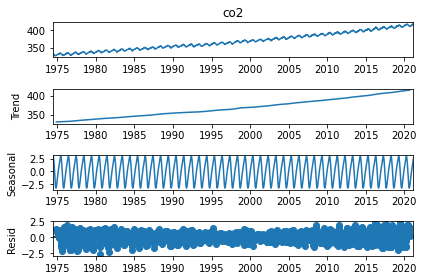

In [134]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ppm, model='additive')
fig = decomposition.plot()

# Autoregressive (linear) model


In [135]:
from statsmodels.tsa import ar_model
ar = ar_model.AR(ppm[:500])
res = ar.fit(maxlag=45)
res.params

C:\Users\Syed Muhammmad Hamza\anaconda3\envs\PY37\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION

const     -1.252412
L1.co2     0.486375
L2.co2     0.177163
L3.co2     0.154143
L4.co2     0.077309
L5.co2     0.048168
L6.co2     0.036464
L7.co2    -0.040259
L8.co2    -0.009897
L9.co2    -0.019114
L10.co2    0.035290
L11.co2   -0.060046
L12.co2   -0.031594
L13.co2   -0.057448
L14.co2   -0.025110
L15.co2    0.001899
L16.co2    0.012732
L17.co2    0.035139
L18.co2   -0.003779
L19.co2   -0.032449
L20.co2   -0.000425
L21.co2    0.084107
L22.co2   -0.014818
L23.co2    0.049543
L24.co2   -0.012823
L25.co2   -0.009376
L26.co2   -0.068373
L27.co2   -0.023022
L28.co2    0.070392
L29.co2   -0.013186
L30.co2    0.072740
L31.co2   -0.068826
L32.co2    0.037717
L33.co2   -0.044082
L34.co2    0.031710
L35.co2   -0.067273
L36.co2   -0.003150
L37.co2   -0.043247
L38.co2   -0.016935
L39.co2    0.010392
L40.co2    0.020408
L41.co2   -0.007657
L42.co2    0.073903
L43.co2   -0.022261
L44.co2    0.046619
L45.co2    0.137379
dtype: float64

<AxesSubplot:xlabel='year_month_day'>

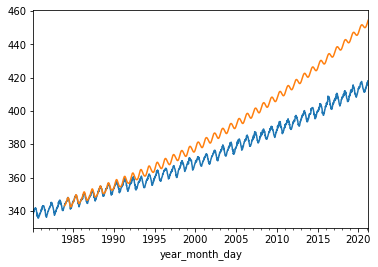

In [136]:
ppm[300:].plot(label="true")
res.predict(ppm.index[500],
  ppm.index[-1]).plot(label="predict")


# Autoregressive integrated moving average (ARIMA)


C:\Users\Syed Muhammmad Hamza\anaconda3\envs\PY37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


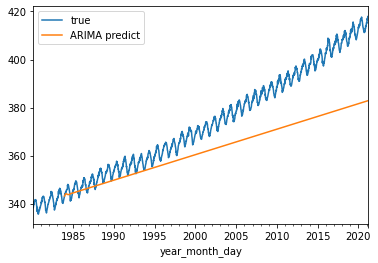

In [137]:
from statsmodels import tsa

arima_model = tsa.arima_model.ARIMA(ppm[:500], order=(12, 1, 0))
res = arima_model.fit()
arima_pred = res.predict(ppm.index[500], ppm.index[-1], typ="levels")
ppm[300:].plot(label="true")
arima_pred.plot(label="ARIMA predict")
plt.legend(loc="best")

# FBProphet

In [139]:
fb_ppm = pd.DataFrame(ppm).reset_index()
fb_ppm.columns = ['ds', 'y']

In [140]:
fb_ppm.head()


,ds,y
0,1974-05-19,333.37
1,1974-05-26,332.95
2,1974-06-02,332.35
3,1974-06-09,332.20
4,1974-06-16,332.37


In [143]:
from fbprophet import Prophet
m = Prophet()
m.fit(fb_ppm[:500])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [145]:
forecast = m.predict(fb_ppm)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2439,2021-02-14,405.341644,224.788481,572.741053
2440,2021-02-21,405.544980,224.635778,573.248350
2441,2021-02-28,405.846063,224.494339,573.285414
2442,2021-03-07,406.215558,224.119439,574.720949
2443,2021-03-14,406.593058,225.042241,574.585980


<AxesSubplot:>

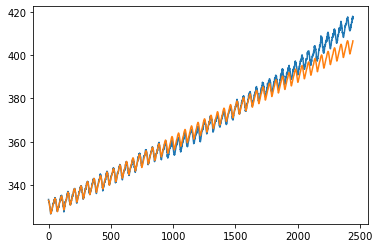

In [146]:
fb_ppm.y.plot()
forecast.yhat.plot()

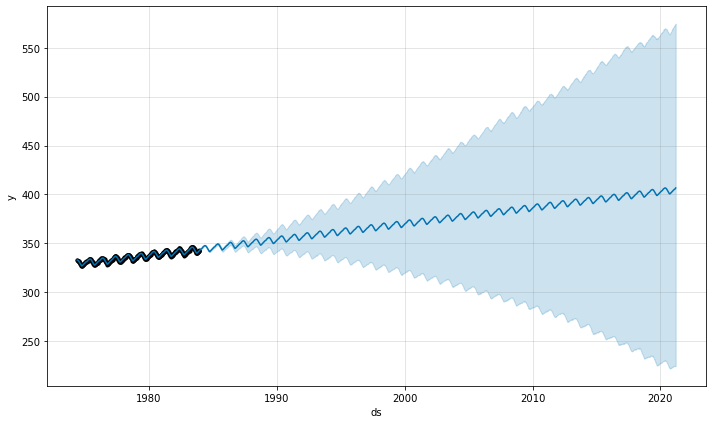

In [147]:
m.plot(forecast);


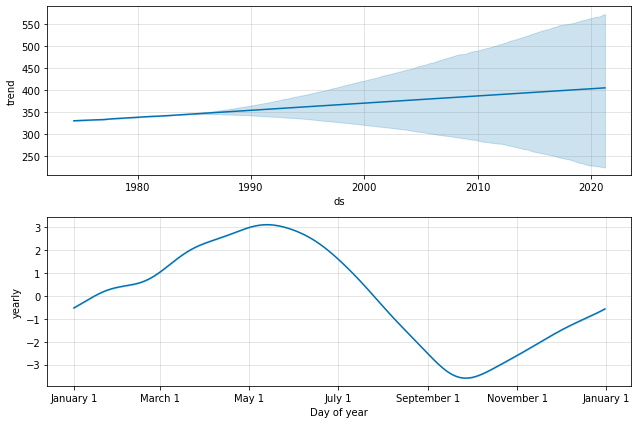

In [148]:
m.plot_components(forecast);
